In [6]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
# Fetch the dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target  # Median house value for California districts

# Display the first few rows
print(data.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


# Exploratory Data Analysis (EDA)

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

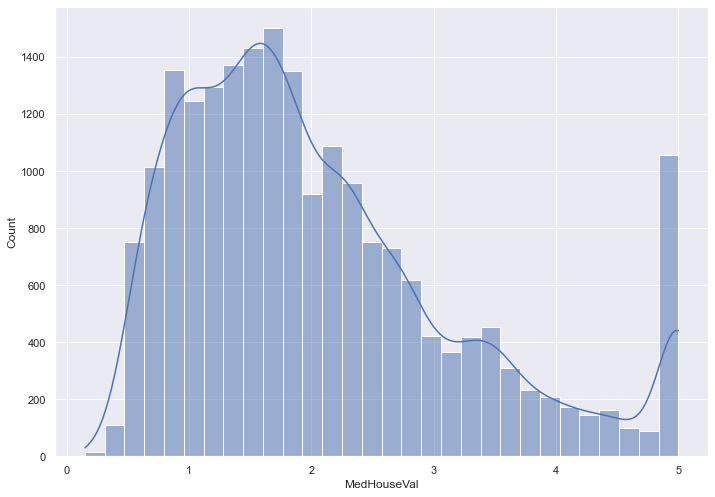

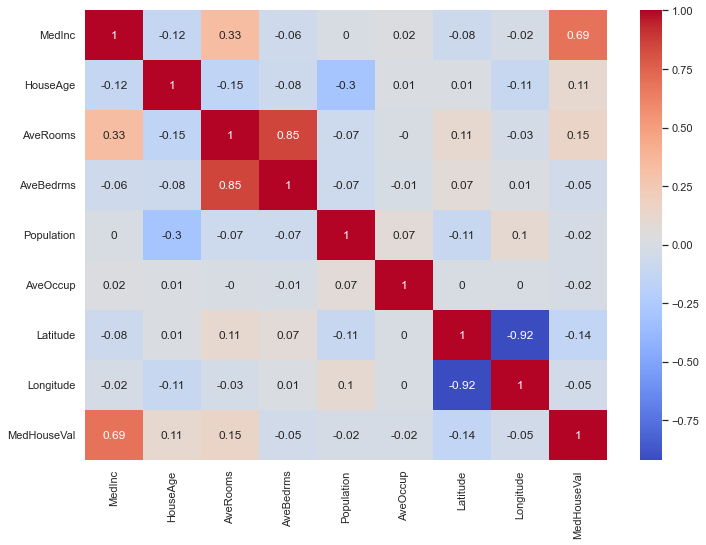

In [8]:
# Basic statistics
print(data.describe())

# Plotting distributions of features and the target variable
sns.set(rc={'figure.figsize':(11.7,8.27)})  # Setting figure size
sns.histplot(data['MedHouseVal'], bins=30, kde=True)
plt.show()

# Correlation matrix heatmap to find related features
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


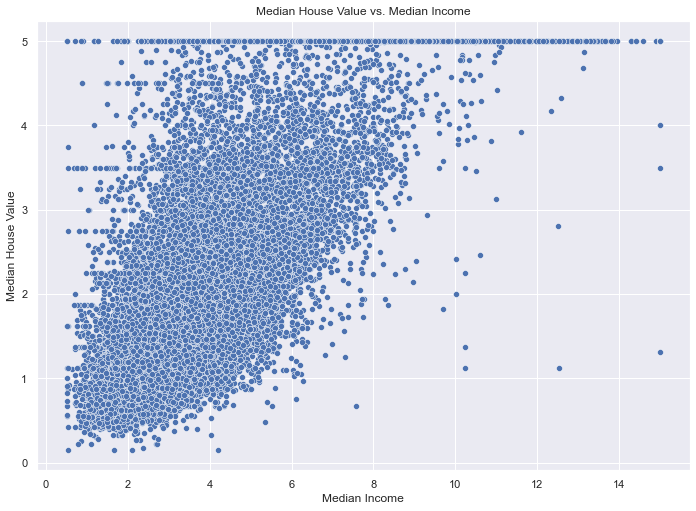

In [14]:
# Assuming 'MedInc' (median income) is an important feature
sns.scatterplot(x=data['MedInc'], y=data['MedHouseVal'])
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


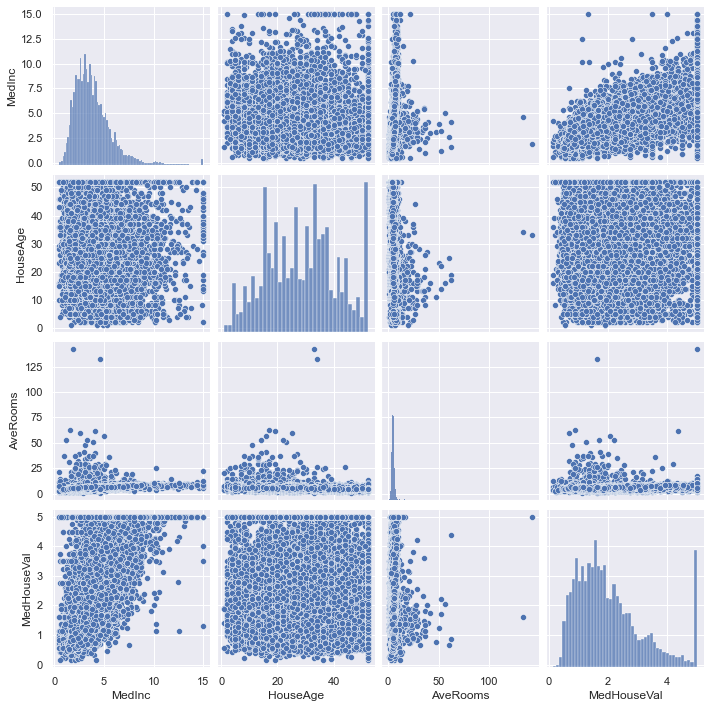

In [17]:
# Select a few important features
selected_features = ['MedInc', 'HouseAge', 'AveRooms', 'MedHouseVal']
sns.pairplot(data[selected_features])
plt.show()

# Data Preprocessing

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Selection and Training

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.5558915986952444


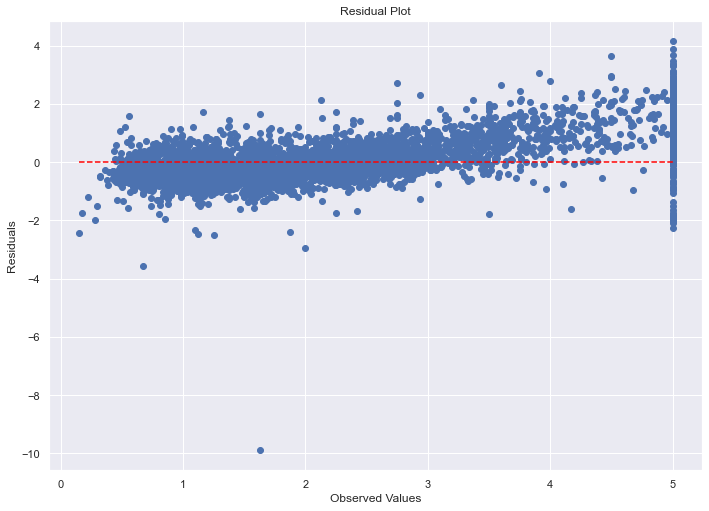

In [18]:
import numpy as np

# Calculate residuals
residuals = y_test - y_pred

plt.scatter(y_test, residuals)
plt.title('Residual Plot')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red', linestyles='--')
plt.show()


# Model Evaluation and Refinement

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Train a RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')


Random Forest MSE: 0.255169737347244


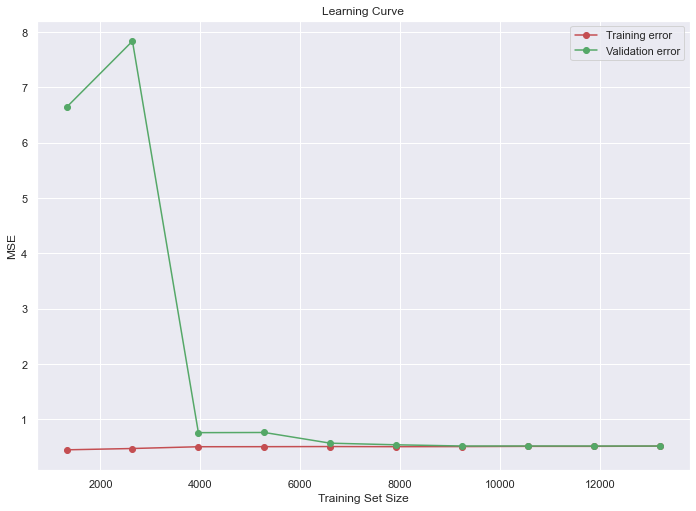

In [19]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = LinearRegression(),
    X = X_train_scaled,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 10),
    scoring = 'neg_mean_squared_error'
)

# Calculate means and standard deviations
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training error")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Validation error")
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.legend(loc="best")
plt.show()


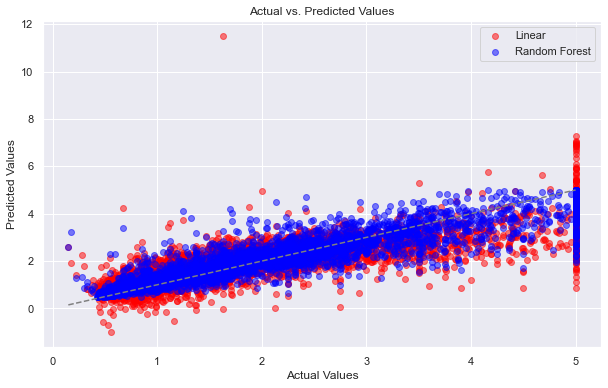

In [20]:
import matplotlib.pyplot as plt

# Assuming y_test_rf and y_pred_rf are available from your Random Forest model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='red', label='Linear')
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue', label='Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')
plt.show()


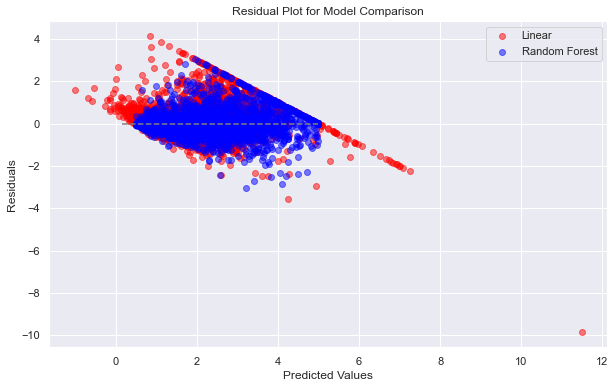

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred, color='red', label='Linear', alpha=0.5)
plt.scatter(y_pred_rf, y_test - y_pred_rf, color='blue', label='Random Forest', alpha=0.5)
plt.hlines(0, min(y_test), max(y_test), colors='gray', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Model Comparison')
plt.legend()
plt.show()
